In [19]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from PIL import Image
import skimage.io

In [53]:
train_data = pd.read_csv('train_split_v3.txt', header=None, sep=' ', names=['id','image', 'result', 'type1', 'type2'])
train_data.head()

,id,image,result,type1,type2
0,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,pneumonia,PA,NaN
1,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,pneumonia,PA,NaN
2,3,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,pneumonia,PA,NaN
3,7,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day...,pneumonia,PA,NaN
4,7,SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day...,pneumonia,PA,NaN


In [45]:
train_data.count()

id        13640
image     14532
result    14532
type1       224
type2        27
dtype: int64

In [34]:
train_datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    zoom_range=(0.85, 1.15),
    fill_mode='constant',
    cval=0.,
)

In [78]:
!mkdir augmentation

In [76]:
new_train_data = pd.DataFrame(columns=['id','image', 'result', 'type1', 'type2'])
new_train_data.head()

,id,image,result,type1,type2


In [77]:
new_train_data = pd.concat([new_train_data,train_data[train_data['result'] == 'normal'].sample(1700, random_state=4)])
new_train_data = pd.concat([new_train_data,train_data[train_data['result'] == 'pneumonia'].sample(1700, random_state=4)])
new_train_data = pd.concat([new_train_data,train_data[train_data['result'] == 'COVID-19']])

new_train_data.head()

,id,image,result,type1,type2
748,21e403ae-139b-4419-b3fa-0bf13d97d245,21e403ae-139b-4419-b3fa-0bf13d97d245.png,normal,NaN,NaN
1911,5458205b-c67a-44de-a1e3-009f977b4f98,5458205b-c67a-44de-a1e3-009f977b4f98.png,normal,NaN,NaN
1503,4769fa12-e694-48ce-ad4e-0628e5dd75f0,4769fa12-e694-48ce-ad4e-0628e5dd75f0.png,normal,NaN,NaN
6084,c8b05677-ce24-4967-a152-3602c5332c4c,c8b05677-ce24-4967-a152-3602c5332c4c.png,normal,NaN,NaN
6585,d8fe9c83-74df-4ca8-8075-012b6f1076bc,d8fe9c83-74df-4ca8-8075-012b6f1076bc.png,normal,NaN,NaN


In [79]:
import skimage.color

total_augmented = 0
for index, row in train_data[train_data['result'] == 'COVID-19'].iterrows():
    img = plt.imread("train/" + row['image'])
    img = skimage.color.gray2rgb(img)
    img = np.expand_dims(img,axis=0)
    i = 0
    for batch in train_datagen.flow(img, batch_size=1):
        i += 1
        if (i % 7) == 0:
            break
        name = 'agm-' + str(index) +"-"+ str(i) + ".jpg"
        new_train_data = new_train_data.append({
            "image": name,
            "result": "COVID-19"
        }, ignore_index = True)
        cv2.imwrite("augmentation/" + name, batch[0])
        total_augmented += 1

print(total_augmented)

1338


<Figure size 432x288 with 0 Axes>

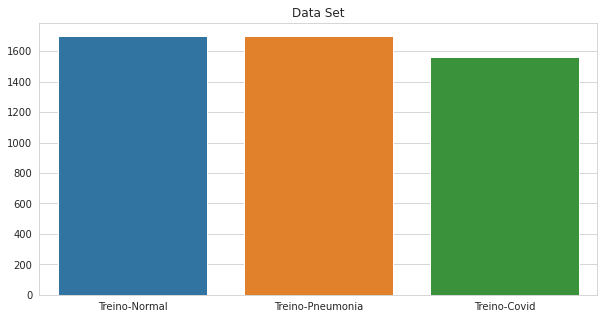

In [80]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure()    
plt.subplots(figsize=(10,5))
grafico=sns.barplot(x=['Treino-Normal','Treino-Pneumonia','Treino-Covid'],
                    y=[new_train_data[new_train_data['result'] == 'normal'].shape[0],
                       new_train_data[new_train_data['result'] == 'pneumonia'].shape[0],
                       new_train_data[new_train_data['result'] == 'COVID-19'].shape[0],
                    ]) 
grafico.set_title('Data Set')
plt.show()

In [82]:
new_train_data.to_csv("train_split_v3_augmented.csv")

In [85]:
!mv augmentation/* train/
!rm augmentation

In [83]:
train_data_augmented = pd.read_csv('train_split_v3_augmented.csv', header=None, sep=',', names=['id','image', 'result', 'type1', 'type2'], na_values='')
train_data_augmented.count()

id        3624
image     4962
result    4962
type1      203
type2       28
dtype: int64